In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler  # Import undersampling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define file paths for training, testing, and validation CSV files
test_path = '/content/drive/MyDrive/DL/test_data.csv'
train_path = '/content/drive/MyDrive/DL/train_data.csv'
valid_path = '/content/drive/MyDrive/DL/valid_data.csv'


In [5]:
# Load CSV files into DataFrames
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
valid_df = pd.read_csv(valid_path)

In [6]:

# Load the dataset
train_set = pd.read_csv(train_path)
valid_set = pd.read_csv(valid_path)
test_set = pd.read_csv(test_path)

# Extract labels and features from train, validation, and test sets
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])

y_valid = valid_set['label']
x_valid = valid_set.drop(columns=['label'])

y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Display lengths of the datasets
print("Training set length:", len(train_set))
print("Validation set length:", len(valid_set))
print("Test set length:", len(test_set))

Training set length: 8012
Validation set length: 1001
Test set length: 1002


In [7]:
# Define classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}



Text(0.5, 1.0, 'Class Distribution Before Undersampling')

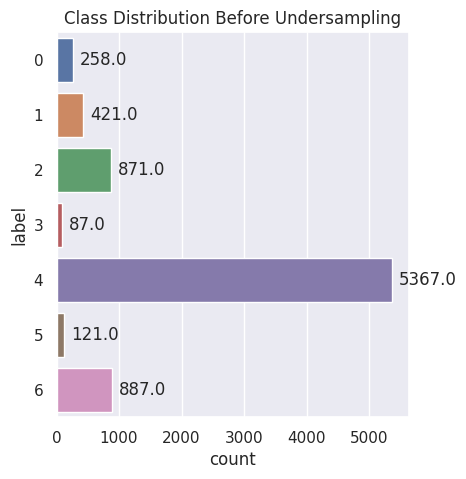

In [8]:
# Extract features and labels for training set
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])

# Extract features and labels for validation set
y_valid = valid_set['label']
x_valid = valid_set.drop(columns=['label'])

# Extract features and labels for test set
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

# Convert x_train, x_valid, and x_test to NumPy arrays
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
x_valid = np.array(x_valid, dtype=np.uint8).reshape(-1, 28, 28, 3)
x_test = np.array(x_test, dtype=np.uint8).reshape(-1, 28, 28, 3)

# Reshape x_train to 2D array
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)

# Countplot for better visibility of class distribution in the training set before undersampling
sns.set(style="darkgrid")
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax = sns.countplot(y=y_train)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Class Distribution Before Undersampling')

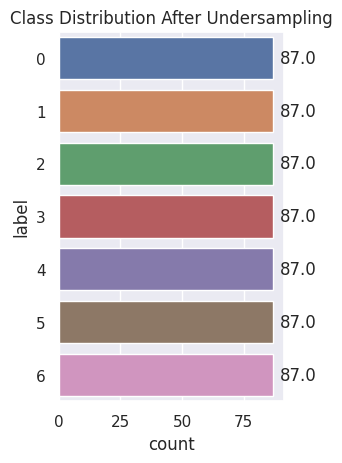

In [9]:
# Resample the training set using RandomUnderSampler to address class imbalance
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
x_train_resampled, y_train_resampled = undersampler.fit_resample(x_train_reshaped, y_train)

# Reshape x_train_resampled back to 4D array
x_train_resampled = x_train_resampled.reshape(x_train_resampled.shape[0], 28, 28, 3)

# Countplot after undersampling
plt.subplot(1, 2, 2)
ax = sns.countplot(y=y_train_resampled)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Class Distribution After Undersampling')

plt.show()

In [10]:
# Create a convolutional neural network model
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7, activation='softmax'))

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0

In [11]:
# Define model callbacks
callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_cnn_und.h5',
                                              monitor='val_accuracy', mode='max',
                                              verbose=1, save_best_only=True)

In [12]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [13]:
# Train the model
history = model.fit(x_train_resampled, y_train_resampled,
                    validation_data=(x_valid, y_valid),
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
5/5 [==============================] - ETA: 0s - loss: 2.3399 - accuracy: 0.1872 
Epoch 1: val_accuracy improved from -inf to 0.65734, saving model to /content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_cnn_und.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 14s 496ms/step - loss: 2.3399 - accuracy: 0.1872 - val_loss: 1.4758 - val_accuracy: 0.6573
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 2.0691 - accuracy: 0.2500
Epoch 2: val_accuracy improved from 0.65734 to 0.66533, saving model to /content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_cnn_und.h5
5/5 [==============================] - 0s 66ms/step - loss: 2.0100 - accuracy: 0.2414 - val_loss: 1.5072 - val_accuracy: 0.6653
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 1.8057 - accuracy: 0.2969
Epoch 3: val_accuracy did not improve from 0.66533
5/5 [==============================] - 0s 33ms/step - loss: 1.8787 - accuracy: 0.2923 - val_loss: 1.6201 - val_accuracy: 0.6573
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 1.9222 - accuracy: 0.2656
Epoch 4: val_accuracy did not improve from 0.66533
5/5 [==============================] - 0s 33ms/step - loss: 1.8423 - accuracy: 0.2972 - val

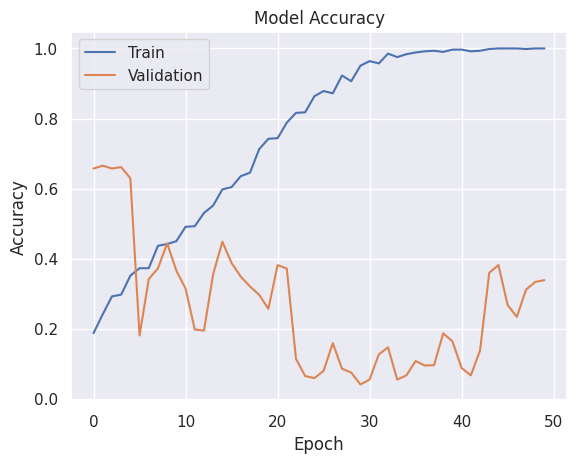

In [14]:
# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# Load the best model weights
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Skin Cancer/best_model_cnn_und.h5')

In [16]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

32/32 - 1s - loss: 1.5396 - accuracy: 0.6507 - 514ms/epoch - 16ms/step
Test Loss: 1.5396
Test Accuracy: 0.6507


In [17]:
# Generate confusion matrix and classification report
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


32/32 [==============================] - 1s 6ms/step
Confusion Matrix:
[[  0   0   0   0  30   0   0]
 [  0   0   0   0  55   0   0]
 [  0   0   0   0 113   0   2]
 [  0   0   0   0  12   0   0]
 [  0   0   0   0 648   0  16]
 [  0   0   0   0  13   0   0]
 [  0   0   0   0 109   0   4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00       115
           3       0.00      0.00      0.00        12
           4       0.66      0.98      0.79       664
           5       0.00      0.00      0.00        13
           6       0.18      0.04      0.06       113

    accuracy                           0.65      1002
   macro avg       0.12      0.14      0.12      1002
weighted avg       0.46      0.65      0.53      1002



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
